# Quantum Computing Workshop: Introduction to Qiskit 1

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Operator, Statevector


from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
with open('../../api_key.txt', 'r') as file:
    token = file.read()

service = QiskitRuntimeService(channel="ibm_quantum",token=token)

In [2]:
# Other useful imports
import numpy as np
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Backends

- **Simulators:** Based on classical hardware. Great for prototyping and learning
    - Local
        - AerSimulator: Simulator for quantum circuit execution.
        - Statevector simulator: Reveals information on the full state of the system of qubits.
    - Cloud
        - qasm_simulator: Can mimic hardware noise.
- **Real Quantum hardware:** Used when execution on simulators does not scale.

In [3]:
# Instantiate a backend for local execution
aer_backend = AerSimulator()
# Instantiate a statevector simulator backend
sv_backend = Aer.get_backend("statevector_simulator")

## Basic Not circuit
Goal: flip a qubit from the initial $|0\rangle$ state to the $|1\rangle$ state

Note that qubits on IBM systems are always reset to the $|0\rangle$ state at the start of the circuit.

In [4]:
# Create a NOT circuit

# Your code goes here
qc = QuantumCircuit(1,1)
qc.x(0)
qc.draw("mpl")


TypeError: can only be called with ndarray object

Error in callback <function _draw_all_if_interactive at 0x30ee107c0> (for post_execute), with arguments args (),kwargs {}:


ValueError: object __array__ method not producing an array

ImportError: cannot import name 'ERR_IGNORE' from 'numpy.core.umath' (/Users/joe8922/miniconda3/envs/qiskit_env/lib/python3.11/site-packages/numpy/core/umath.py)

<Figure size 185.453x200.667 with 1 Axes>

**Note**: 

Every circuit performs a transformation to our initial state of qubits. 

This transformation can be represented as matrix.

In [6]:
# Display the Operator (2x2 Matrix) that corresponds to this circuit

# Your code goes here
Operator(qc).draw("latex")

<IPython.core.display.Latex object>

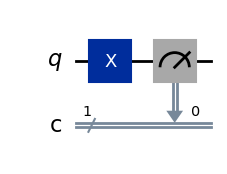

In [7]:
# Measure qbit 0 -> cbit 0

# Your code goes here
_ = qc.measure(0,0)
qc.draw("mpl")

In [8]:
# Run the circuit on a local backend with different number of shots (1,10, 2048)
# What are the respective counts?

# Your code goes here
counts = [aer_backend.run(qc,shots=shot).result().get_counts() for shot in [1,10,2048]]
counts

[{'1': 1}, {'1': 10}, {'1': 2048}]

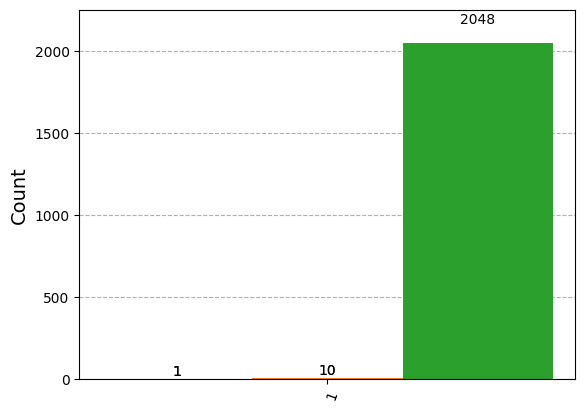

In [9]:
# Visualize the counts

# Your code goes here
plot_histogram(counts)

**Note**:

No matter how repeatedly we execute the NOT circuit, the result is always the same: This circuit performs a deterministic operation (if we omit the noise, present in real quantum hardware).

## Superposition

Goal: place a qubit into an equal superposition of $|0\rangle$ and $|1\rangle$

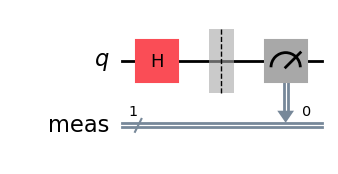

In [10]:
# Create superposition circuit (sp_circ) by using the Hadamard gate. Measure qbit 0 -> cbit 0

# Your code goes here
sp_circ = QuantumCircuit(1)
sp_circ.h(0)
sp_circ.measure_all()
sp_circ.draw("mpl")

In [11]:
# Run the simulation for different number of shots (1,10, 2048)
# What are the respective counts?
sp_counts = [aer_backend.run(sp_circ, shots=shot).result().get_counts() for shot in [1,10,2048]]

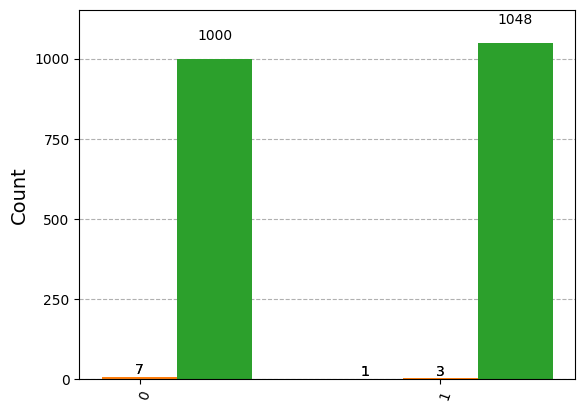

In [12]:
# Plot
plot_histogram(sp_counts)

**Note**:

The Hadamard operation is probabilistic. Classical computers can only simulate this operation. Real quantum computers can execute probabilistic operations natively.

## Multiple qubits in superposition

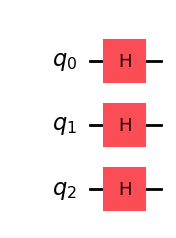

In [13]:
# Create superposition circuit (sp_circ2) between 3 qubits and measure them.
n_qubits = 3

# Your code goes here
sp_circ2 = QuantumCircuit(n_qubits)
for qubit in range(n_qubits):
    sp_circ2.h(qubit)
sp_circ2.draw("mpl")

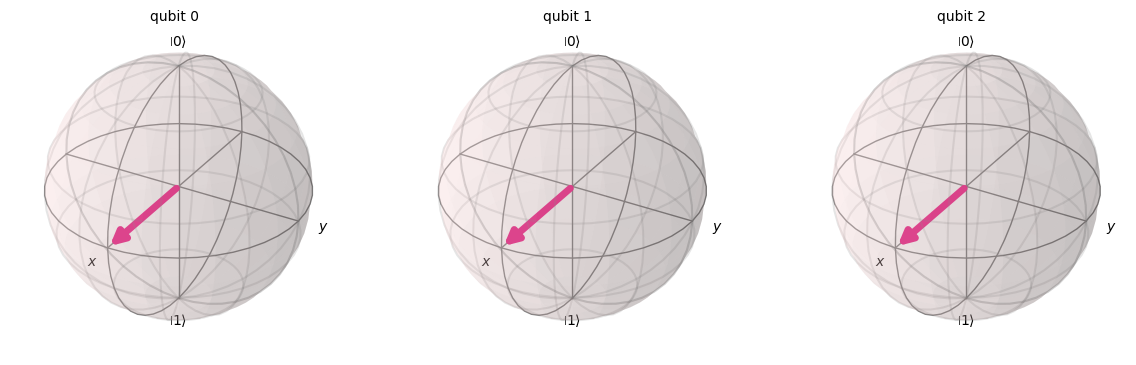

In [14]:
# Run the superpositon circuit on a statevector simulator backend
# Visualize the states on bloch spheres

# Your code goes here
plot_bloch_multivector(sp_circ2)


In [15]:
Statevector(sp_circ2).draw("latex")

<IPython.core.display.Latex object>

State: 100 - Measurement probability: 0.1252
State: 111 - Measurement probability: 0.1287
State: 011 - Measurement probability: 0.1275
State: 101 - Measurement probability: 0.1273
State: 001 - Measurement probability: 0.1257
State: 000 - Measurement probability: 0.1217
State: 010 - Measurement probability: 0.1216
State: 110 - Measurement probability: 0.1223


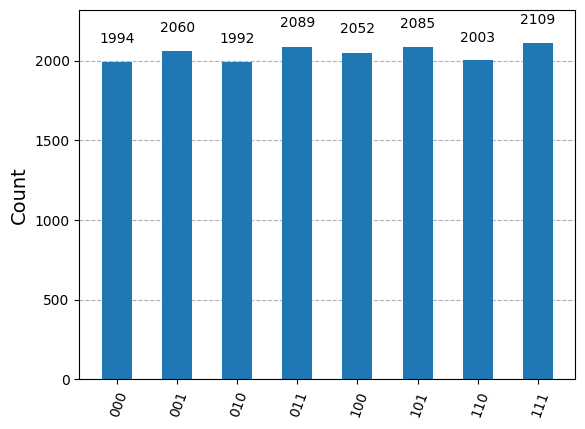

In [16]:
# Run simulation and plot results
sp_circ2.measure_all()
job = aer_backend.run(sp_circ2,shots=2**14)
sp_counts = job.result().get_counts()
for state, count in sp_counts.items():
    print(f'State: {state} - Measurement probability: {round(count/sum(sp_counts.values()),4)}')
plot_histogram(sp_counts)

**Questions**:
1) When creating a superposition between N-Qubits, how many possible states can be measured? 
2) What is the probability of measuring one particular state if all qubits are in equal superposition?

## Bell state (entanglement)
Goal: Create the $\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ entangled state (Bell state)

When measuring one qubit it is with equal probability in the $|0\rangle$ or $|1\rangle$ state.

The measurement of one qubit "collapses" the other qubit.

The measurements among maximally entangled qubits are perfectly correlated.

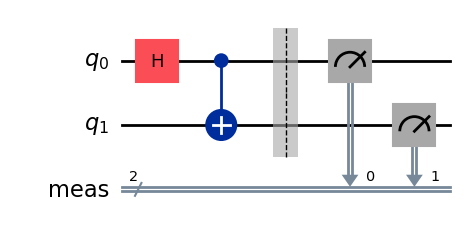

In [57]:
# Create Bell state circuit (bell_circ). Meaure all qubits to clbits.

# Your code goes here
bell_circ = QuantumCircuit(2)
bell_circ.h(0)
bell_circ.cx(0,1)
bell_circ.measure_all()
bell_circ.draw("mpl")

In [58]:
# Run the bell circuit on a local backend and extract the counts (bell_counts)

# Your code goes here
job = aer_backend.run(bell_circ, shots=2**14)
bell_counts = job.result().get_counts()


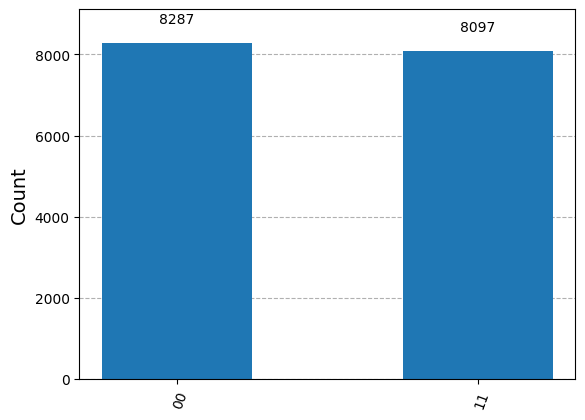

In [59]:
plot_histogram(bell_counts)

## Running on a real quantum computer

In [60]:
# List all backends that are available for you

# Your code goes here
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [61]:
# Simpliy select the least busy backend

# Your code goes here
service.least_busy()

<IBMBackend('ibm_brisbane')>

In [22]:
# Or select a particular backend

# Your code goes here
ibmq_backend = service.backend("ibm_brisbane")

In [23]:
print(f"Native gates: {ibmq_backend.operation_names}")

Native gates: ['id', 'sx', 'if_else', 'reset', 'for_loop', 'measure', 'delay', 'x', 'ecr', 'rz', 'switch_case']


**Note**:

The job failed because the Hadamard gate is not supported as native gate instruction on the selected backend.

We have to **transpile** the circuit first: Translate the gates in our circuit to natively supported gates.

Original circuit depth 3
Transpiled circuit depth 8


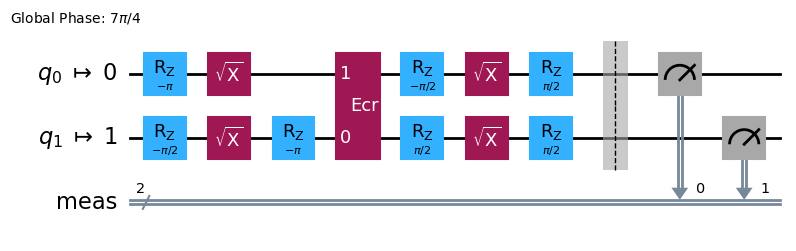

In [55]:
print(f'Original circuit depth {bell_circ.depth()}')
bell_circ_tp = transpile(bell_circ, ibmq_backend)
print(f'Transpiled circuit depth {bell_circ_tp.depth()}')
bell_circ_tp.draw("mpl", idle_wires=False)

**Note**

Transpilation usually increases the depth of our circuit.

In [62]:
# job_bell_tp = ibmq_backend.run(bell_circ_tp)
# job_bell_tp

/tmp/ipykernel_13077/2795661609.py:1: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job_bell_tp = ibmq_backend.run(bell_circ_tp)


<RuntimeJob('cxr5hddwk6yg008hqdb0', 'circuit-runner')>

In [75]:
job_bell_tp.status()

/tmp/ipykernel_13077/1360606861.py:1: DeprecationWarning: In a future release of qiskit-ibm-runtime no sooner than 3 months after the release date of 0.30.0, RuntimeJob.status() will be returned as a string instead of an instance of `JobStatus`. To prepare for this change, you can use the idiom `status.name if isinstance(status, JobStatus) else status`.
  job_bell_tp.status()


<JobStatus.DONE: 'job has successfully run'>

In [76]:
service.jobs()

[<RuntimeJob('cxr5hddwk6yg008hqdb0', 'circuit-runner')>,
 <RuntimeJob('cxr5f344a290008xmmc0', 'circuit-runner')>,
 <RuntimeJob('cxr5f0m3wrp0008kmpc0', 'circuit-runner')>,
 <RuntimeJob('cxr59cd082700083z0qg', 'circuit-runner')>,
 <RuntimeJob('cx3n4qjtpsjg008v44p0', 'estimator')>,
 <RuntimeJob('cx3mpfsztp30008689w0', 'estimator')>,
 <RuntimeJob('cx3mh6wrkac00085h370', 'estimator')>,
 <RuntimeJob('cx3mg8hpx23g008e2680', 'estimator')>,
 <RuntimeJob('cx3m8napx23g008e25eg', 'estimator')>,
 <RuntimeJob('cx3m1n6tpsjg0084ghqg', 'estimator')>]

In [77]:
job_bell_tp_1 = service.job("cxr5hddwk6yg008hqdb0")
job_bell_tp_1.logs()

'12/28/2024 19:59:52.554 - user_logger - WARNING circuit-runner (used by backend.run) is deprecated and\n    will be removed no sooner than 15 October 2024.\n    You can instead use V2 Sampler. Refer to the migration guide for more details:\n    https://docs.quantum.ibm.com/api/migration-guides/v2-primitives .\n    for more details.\n'

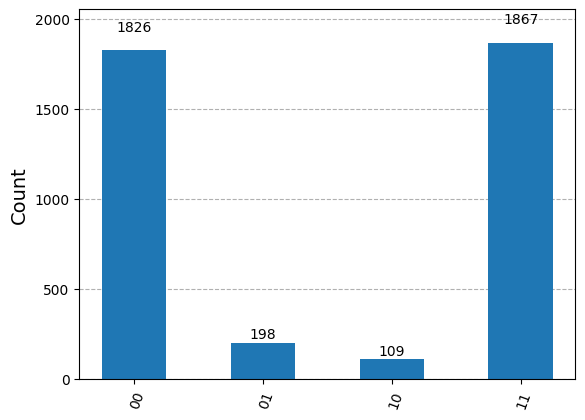

In [78]:
counts = job_bell_tp_1.result().get_counts()
plot_histogram(counts)

**Note**:

The results on real quantum hardware shows measurement probabilities for the $|01\rangle$ and $|10\rangle$ states. This is due to **noise** (inaccuracies) in the quantum hardware.

## GHZ Circuit

A GHZ state is a maximal entangled state of multiple qubits, i.e. an extension of the Bell states to more than 2 qubits.

In [80]:
def make_ghz(n_qubits: int = 3) -> QuantumCircuit:
    ghz_circ = QuantumCircuit(n_qubits)
    ghz_circ.h(0)
    for target in range(1,n_qubits):
        ghz_circ.cx(0,target)
    return ghz_circ

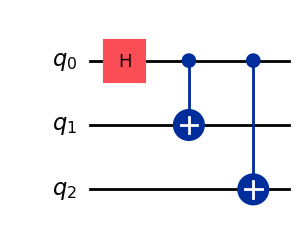

In [81]:
# Create a 3-qubit GHZ state circuit (ghz_circ)
n_qubits = 3

# Your code goes here
ghz_circ = make_ghz(n_qubits)
ghz_circ.draw("mpl")

In [82]:
# Run in simulator and plot out the measured result
ghz_state = sv_backend.run(ghz_circ).result().get_statevector()
ghz_probs = Statevector(ghz_state).probabilities()
Operator(ghz_probs).draw("latex")

<IPython.core.display.Latex object>

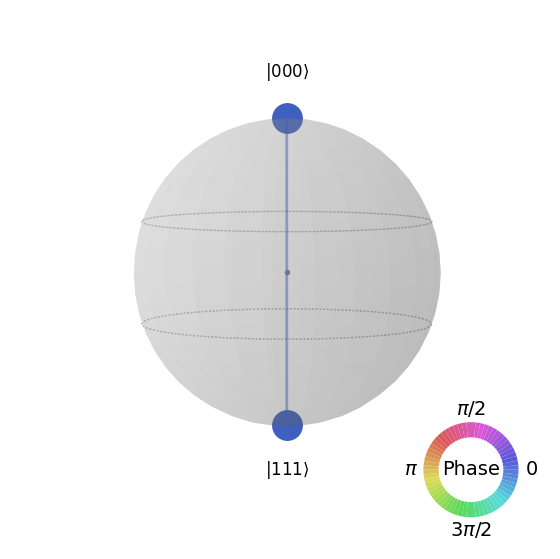

In [83]:
# visualize the GHZ state on a Q-Sphere

# Your code goes here
plot_state_qsphere(ghz_state)

## Larger GHZ circuit

Let's take this to the next level and create an even larger GHZ state.

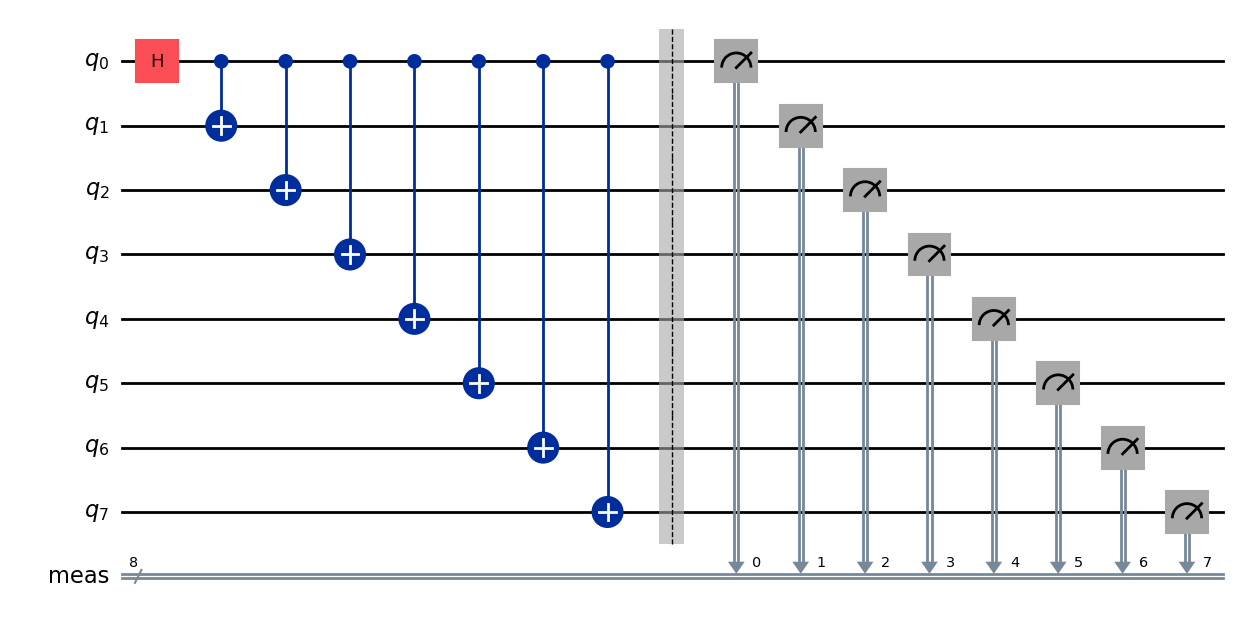

In [88]:
n_qubits = 8

big_ghz = make_ghz(n_qubits)
big_ghz.measure_all()
big_ghz.draw("mpl")

Original big GHZ circuit depth 9
Transpiled circuit depth 54


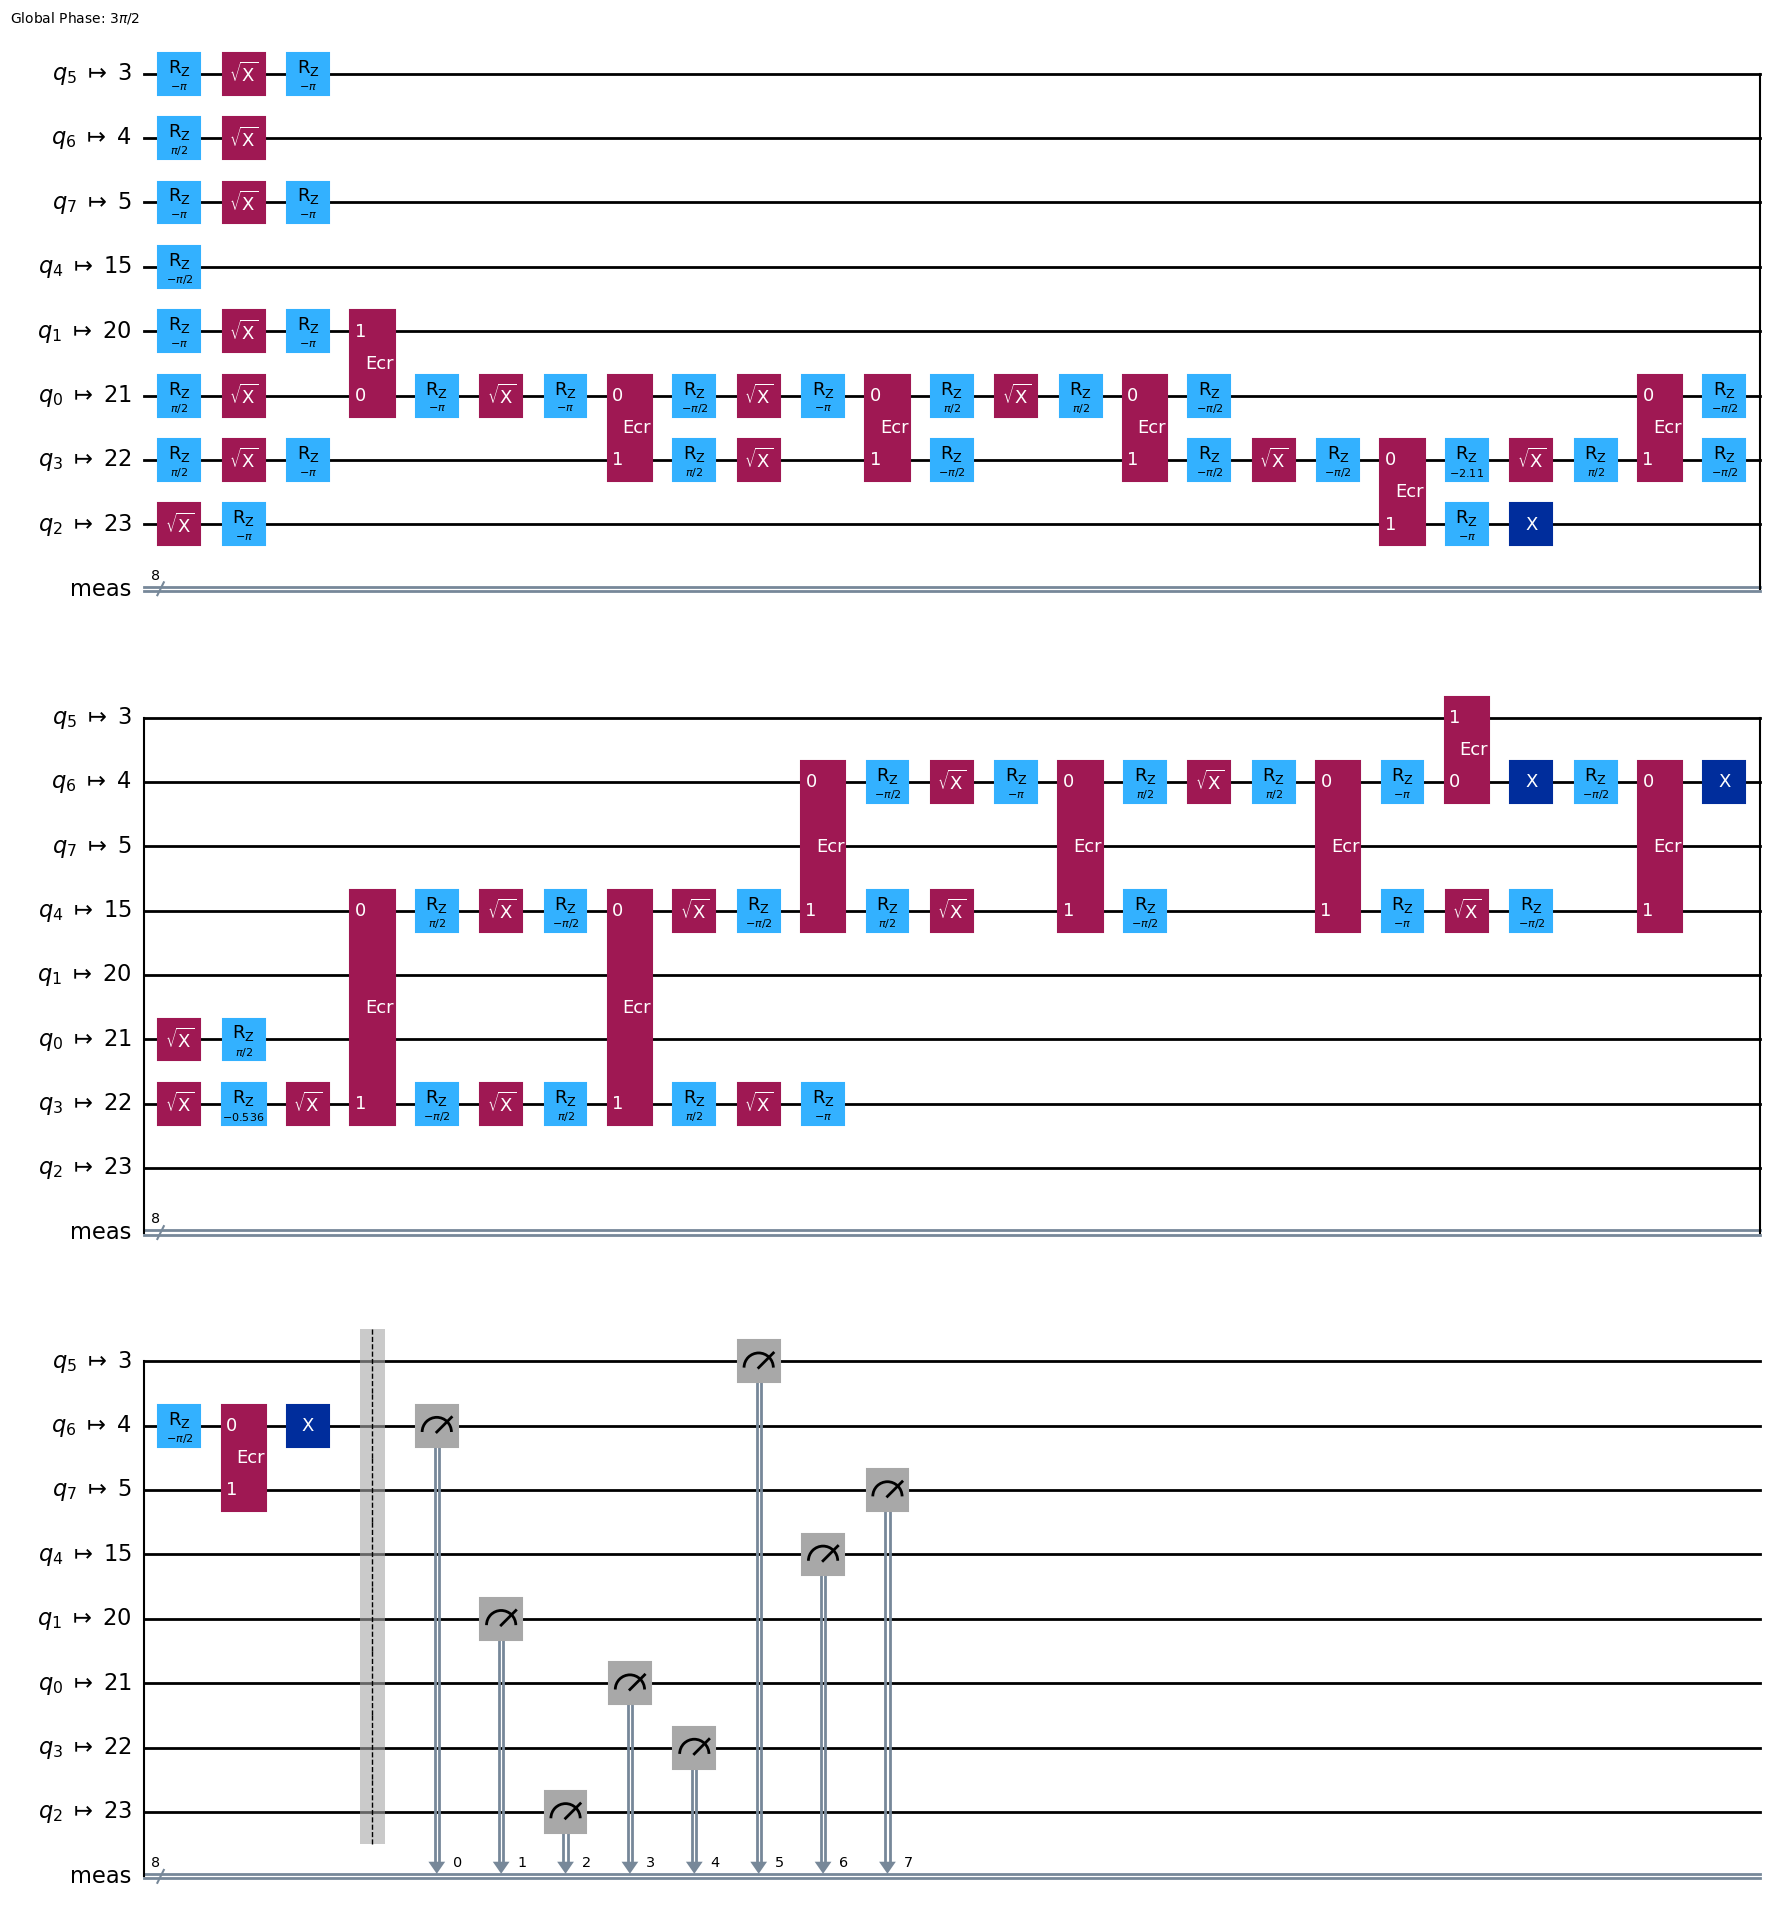

In [89]:
print(f'Original big GHZ circuit depth {big_ghz.depth()}')
big_ghz_tp = transpile(big_ghz, ibmq_backend, optimization_level=3)
print(f'Transpiled circuit depth {big_ghz_tp.depth()}')
big_ghz_tp.draw("mpl", idle_wires=False)

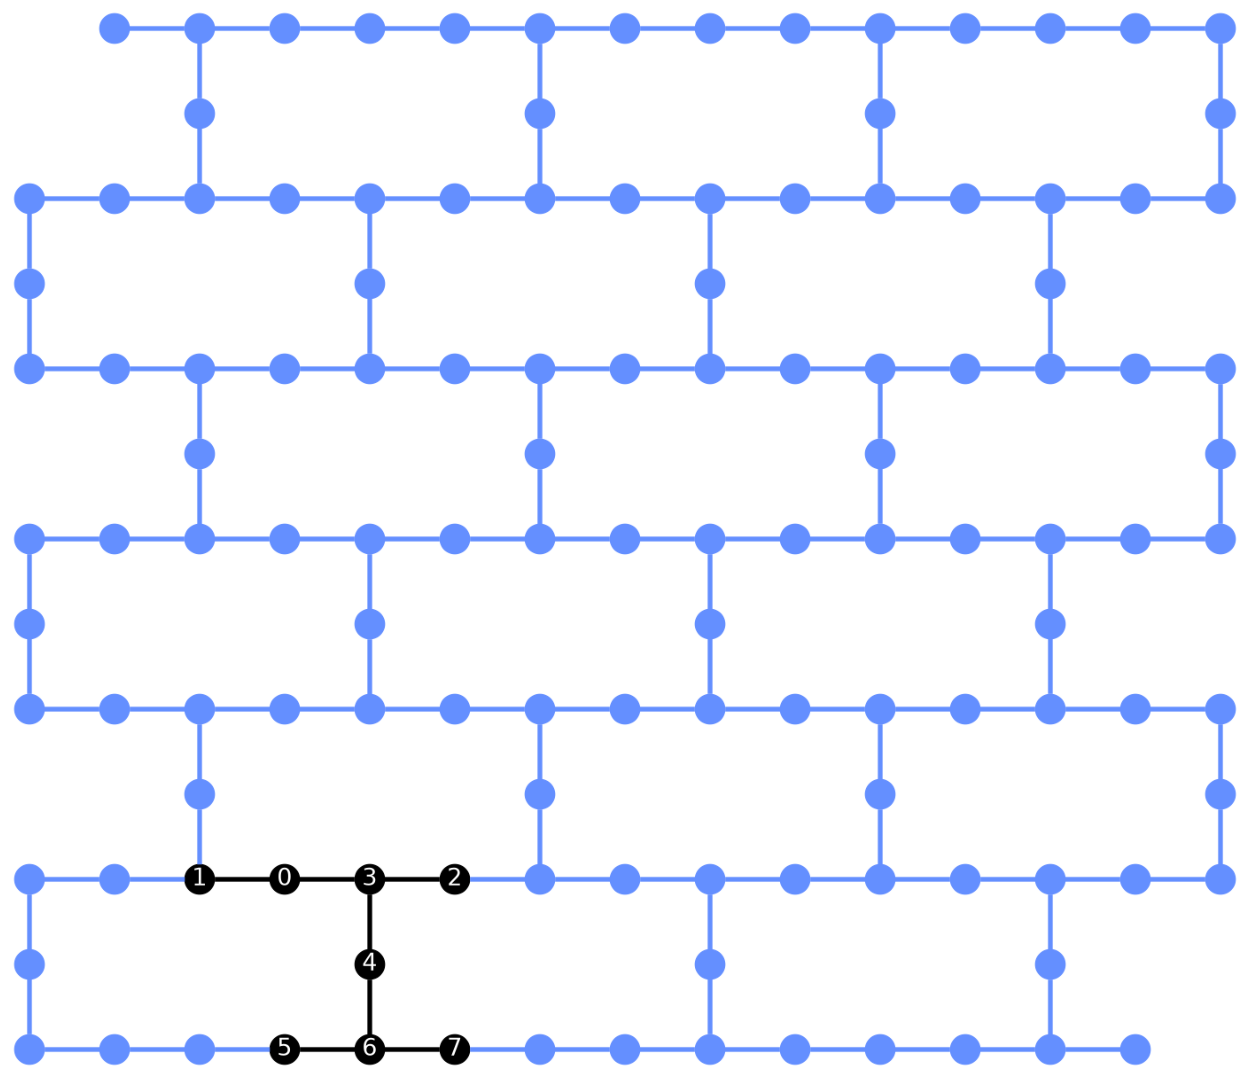

In [90]:
plot_circuit_layout(big_ghz_tp,ibmq_backend)

In [91]:
# job_big_ghz = ibmq_backend.run(big_ghz_tp)
# job_big_ghz

/tmp/ipykernel_13077/216153385.py:1: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job_big_ghz = ibmq_backend.run(big_ghz_tp)


<RuntimeJob('cxr5k8d0v150008096b0', 'circuit-runner')>

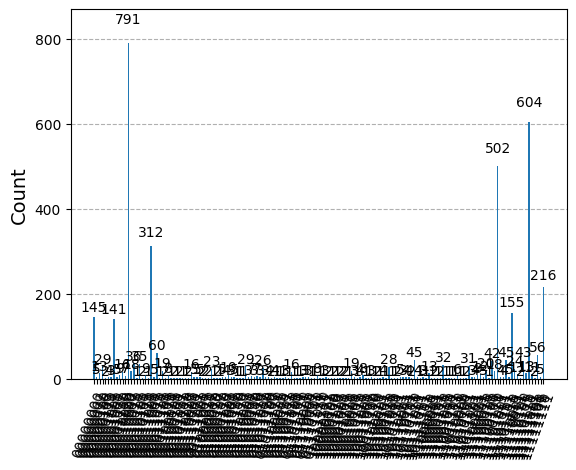

In [92]:
job_big_ghz_1 = service.job("cxr5k8d0v150008096b0")
counts = job_big_ghz_1.result().get_counts()
plot_histogram(counts)

## Challenge

The circuit above is simple, but the overall depth of the circuit is long. This happened because the sequence of CNOT gates is serialized. The system can only execute CNOT gates on a particular qubit one at a time. Long circuit depth can be problematic as a longer circuit is more susceptible to noise and decoherence in current hardware. It would be beneficial to create the same state, but with less overall depth.

Can you find a way to reduce the depth of the GHZ circuit?

In [ ]:
# Your code goes here

In [ ]:
# These are your instructors results. 
job_big_ghz_1_1 = service.job("csrt5jyjkdzg00885ah0")
counts = job_big_ghz_1_1.result().get_counts()
plot_histogram(counts)